<a href="https://colab.research.google.com/github/cosmicishan/Image-Classification/blob/master/mnist_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

Getting a link of mnist_sample dataset.

In [3]:
URLs.MNIST_SAMPLE

'http://files.fast.ai/data/examples/mnist_sample'

untar_data will download the dataset, store it in a path and return the path which we stored in a variable.

In [4]:
path = untar_data(URLs.MNIST_SAMPLE) ; path

PosixPath('/root/.fastai/data/mnist_sample')

Checking the content of path.

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/train')]

It contains the image in different folder with there label name.

In [6]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/mnist_sample/train/3'),
 PosixPath('/root/.fastai/data/mnist_sample/train/7')]

So I am gonna use ImageDataBunch from folder and normalize it.

In [28]:
tfms = get_transforms(do_flip = False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26, bs=64)
data.normalize()

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Test: None

Checking the batch images.

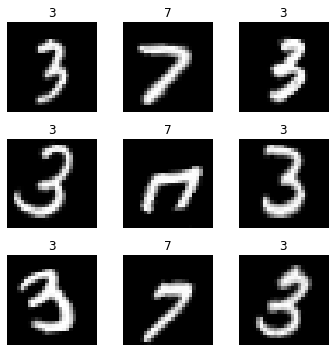

In [29]:
data.show_batch(rows=3, figsize=(5,5))

Checking out the class labels and number of class.

In [30]:
print(data.classes)
len(data.classes)

['3', '7']


2

Training the model by fine tuning resnet34 and printing out the error rate.

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Training with 4 epochs.

In [32]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.272266,0.118638,0.039745,00:17
1,0.140251,0.055359,0.019136,00:17
2,0.100882,0.048424,0.014720,00:17
3,0.064369,0.033279,0.012758,00:17
4,0.064183,0.029919,0.013248,00:17


Using from learner factory method we interpret ths mistakes of model and where it gone wronf.

In [33]:
interp = ClassificationInterpretation.from_learner(learn)

PLotting the top losses.

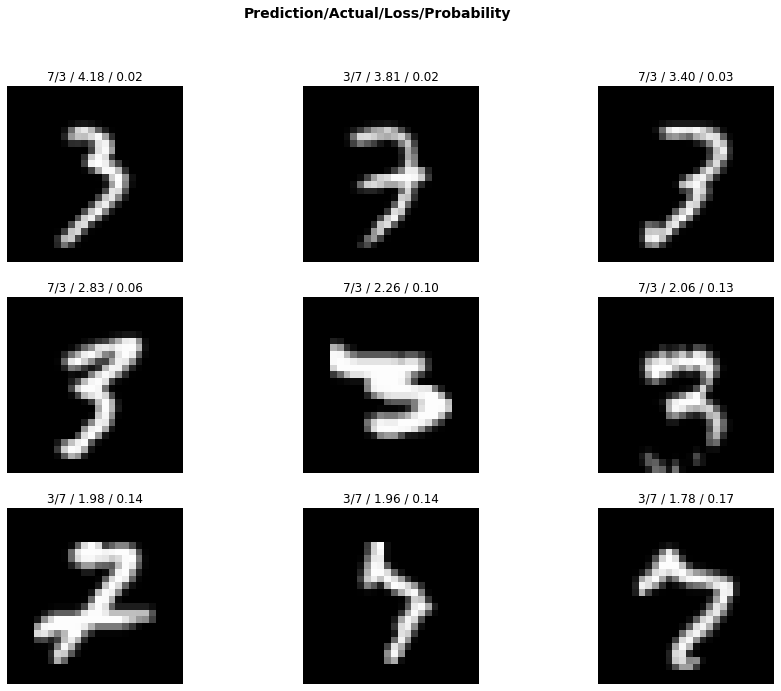

In [34]:
interp.plot_top_losses(9, figsize=(15,11))

Plotting confusion matrix for more details.

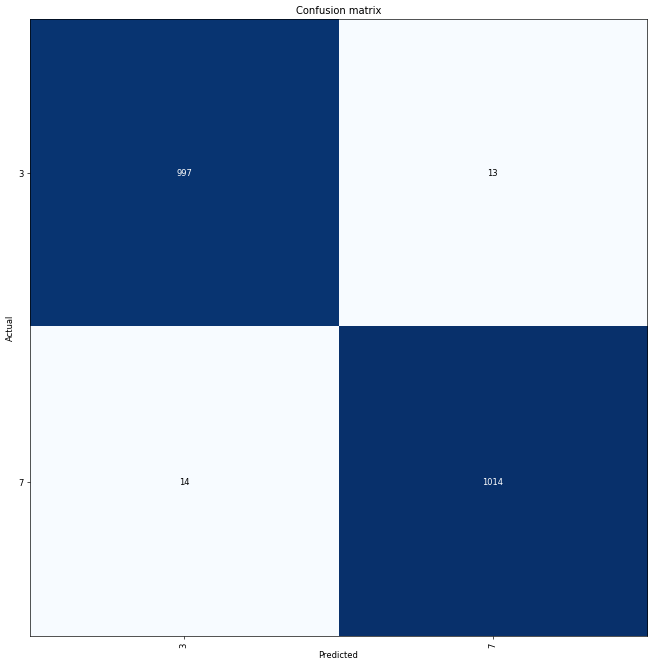

In [35]:
interp.plot_confusion_matrix(figsize=(15,11) , dpi=60)

Connect Google Drive to Google Colab notebook.

In [49]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing the image from the drive.

In [0]:
filename = '/content/drive/My Drive/Picture/number3.png'
img = open_image(filename)

Trained model will take a picture and predict it.

In [51]:
pred = learn.predict(img)
print(pred[0])

3
